In [66]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, Dense
from sklearn.model_selection import train_test_split

In [67]:
queries = []
for i in range(0, 100):
    row = []
    for j in range(0, 100):
        query = str(i) +"+" + str(j)
        row.append([query])
        if eval(query) < 0:
            answer = str(eval(query)) 
        else:
            answer = "+" + str(eval(query))
        row[-1].append(answer)
        query = str(i) +"-" + str(j)
        row.append([query])
        if eval(query) < 0:
            answer = str(eval(query)) 
        else:
            answer ="+" + str(eval(query))
        row[-1].append(answer)
        
    queries.append(row) 

In [68]:
queries

[[['0+0', '+0'],
  ['0-0', '+0'],
  ['0+1', '+1'],
  ['0-1', '-1'],
  ['0+2', '+2'],
  ['0-2', '-2'],
  ['0+3', '+3'],
  ['0-3', '-3'],
  ['0+4', '+4'],
  ['0-4', '-4'],
  ['0+5', '+5'],
  ['0-5', '-5'],
  ['0+6', '+6'],
  ['0-6', '-6'],
  ['0+7', '+7'],
  ['0-7', '-7'],
  ['0+8', '+8'],
  ['0-8', '-8'],
  ['0+9', '+9'],
  ['0-9', '-9'],
  ['0+10', '+10'],
  ['0-10', '-10'],
  ['0+11', '+11'],
  ['0-11', '-11'],
  ['0+12', '+12'],
  ['0-12', '-12'],
  ['0+13', '+13'],
  ['0-13', '-13'],
  ['0+14', '+14'],
  ['0-14', '-14'],
  ['0+15', '+15'],
  ['0-15', '-15'],
  ['0+16', '+16'],
  ['0-16', '-16'],
  ['0+17', '+17'],
  ['0-17', '-17'],
  ['0+18', '+18'],
  ['0-18', '-18'],
  ['0+19', '+19'],
  ['0-19', '-19'],
  ['0+20', '+20'],
  ['0-20', '-20'],
  ['0+21', '+21'],
  ['0-21', '-21'],
  ['0+22', '+22'],
  ['0-22', '-22'],
  ['0+23', '+23'],
  ['0-23', '-23'],
  ['0+24', '+24'],
  ['0-24', '-24'],
  ['0+25', '+25'],
  ['0-25', '-25'],
  ['0+26', '+26'],
  ['0-26', '-26'],
  ['0+27', '+2

In [69]:
import numpy as np

In [70]:
np.shape(queries)

(100, 200, 2)

In [71]:
queries = np.array(queries)

# reshape array
queries = queries.reshape(-1, 2)

In [72]:
queries.shape

(20000, 2)

In [73]:
alphabet = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '+', '-', ' ']

In [74]:
def one_hot_encode(string, length):
    encoded = np.zeros((length, len(alphabet)))
    for i, char in enumerate(string):
        index = alphabet.index(char)
        encoded[i][index] = 1
    return encoded

In [75]:
queries_encoded = np.zeros((20000, 5, 13))
answers_encoded = np.zeros((20000, 4, 13))

In [76]:
for i in range(20000):
        query = queries[i][0]
        answer = queries[i][1]
        queries_encoded[i] = one_hot_encode(query, 5)
        answers_encoded[i] = one_hot_encode(answer, 4)

In [77]:
queries_encoded

array([[[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

  

In [78]:
answers_encoded

array([[[0., 0., 0., ..., 1., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 1., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 1., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 1., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 1., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 1., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

** LSTM**

LSTM stands for Long Short-Term Memory, which is a type of recurrent neural network architecture. It is designed to better handle long-term dependencies and mitigate the vanishing gradient problem

Increasing the number of nodes in a neural network, including LSTM, does not necessarily guarantee an increase in accuracy. While adding more nodes can potentially increase the network's capacity to learn more complex patterns, it also increases the risk of overfitting to the training data, which can result in poorer generalization performance on new data. Therefore, finding the optimal number of nodes for a particular task requires careful experimentation and tuning.

**COMPONENTS **

**Cell state:** The cell state is the memory of the LSTM and is passed along from one time step to the next. It allows the LSTM to maintain information over longer time periods, which is important for tasks such as speech recognition and natural language processing.

**Gates:** LSTM networks use gates to control the flow of information into and out of the cell state. These gates include the forget gate, which determines which information to discard from the cell state, the input gate, which determines which new information to store in the cell state, and the output gate, which determines which information to output from the cell state.

**Hidden state:**  The hidden state is the output of the LSTM network and is used to make predictions. It is calculated based on the cell state and the output gate.

**Activation functions:** LSTM networks use activation functions, such as the sigmoid function and the hyperbolic tangent function, to control the flow of information through the gates and to transform the input and output data.
The first LSTM layer has 1024 memory cells and takes input with a shape of (5, 13), where 5 represents the number of time steps in the sequence and 13 represents the number of features at each time step. The return_sequences argument is set to False, indicating that the LSTM layer will only return the output of the last time step rather than the output of all time steps.

**code explanation**


The RepeatVector layer takes the output of the first LSTM layer and repeats it four times, creating a sequence with a length of 4.

The second LSTM layer also has 1024 memory cells and takes the repeated sequence as input. The return_sequences argument is set to True, indicating that the LSTM layer will return the output of all time steps rather than just the output of the last time step.

Finally, the Dense layer has 13 output units with a softmax activation function, which is commonly used in multiclass classification problems to output probability scores for each class.

Overall, this model is designed to take a sequence of length 5 and 13 features at each time step as input, and output a sequence of length 4 with a probability score for each of 13 classes at each time step. The two LSTM layers are used to learn the temporal dependencies in the input sequence, while the RepeatVector layer allows the second LSTM layer to produce a sequence output. The Dense layer then produces the final output for each time step.

In [79]:
model = Sequential()
model.add(LSTM(1024, input_shape=(5, 13), return_sequences=False))
model.add(RepeatVector(4))
model.add(LSTM(1024, return_sequences=True))
model.add(Dense(13, activation='softmax'))


In [80]:
import random

np.random.shuffle(queries)


In [81]:

queries

array([['18-82', '-64'],
       ['16+71', '+87'],
       ['23+45', '+68'],
       ...,
       ['17-18', '-1'],
       ['56+25', '+81'],
       ['83+99', '+182']], dtype='<U5')

In [82]:
for i in range(20000):
        query = queries[i][0]
        answer = queries[i][1]
        queries_encoded[i] = one_hot_encode(query, 5)
        answers_encoded[i] = one_hot_encode(answer, 4)

In [83]:
queries_encoded

array([[[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]],

       [[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]],

       [[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

  

In [84]:
answers_encoded

array([[[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 1., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 1., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]]])

In [85]:
X_train, X_split, y_train, y_split = train_test_split(queries_encoded, answers_encoded, test_size=0.3, random_state=42)

In [86]:
X_test, X_val, y_test, y_val = train_test_split(X_split, y_split, test_size=0.5, random_state=42)

In [87]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32,validation_data=(X_val, y_val))

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/50
438/438 [==============================] - 14s 23ms/step - loss: 1.3279 - accuracy: 0.3249 - val_loss: 1.2588 - val_accuracy: 0.3219
Epoch 2/50
438/438 [==============================] - 7s 16ms/step - loss: 1.1976 - accuracy: 0.3789 - val_loss: 1.1609 - val_accuracy: 0.3553
Epoch 3/50
438/438 [==============================] - 6s 13ms/step - loss: 1.1220 - accuracy: 0.4042 - val_loss: 1.0984 - val_accuracy: 0.6001
Epoch 4/50
438/438 [==============================] - 6s 14ms/step - loss: 1.0730 - accuracy: 0.4317 - val_loss: 1.0476 - val_accuracy: 0.3981
Epoch 5/50
438/438 [==============================] - 6s 14ms/step - loss: 1.0262 - accuracy: 0.4492 - val_loss: 0.9935 - val_accuracy: 0.4361
Epoch 6/50
438/438 [==============================] - 6s 14ms/step - loss: 0.9799 - accuracy: 0.4771 - val_loss: 0.9564 - val_accuracy: 0.4489
Epoch 7/50
438/438 [==============================] - 6s 13ms/step - loss: 0.9333 - accuracy: 0.4853 - val_loss: 0.9355 - val_accuracy: 0.460

In [88]:
queries_reverse=[]
for i in range(len(queries)):
    row=[]
    query = queries[i][0]
    answer = queries[i][1]
    row.append(query[::-1])
    row.append(answer[::-1])
    queries_reverse.append(row)

In [89]:
queries_reverse

[['28-81', '46-'],
 ['17+61', '78+'],
 ['54+32', '86+'],
 ['77-95', '81-'],
 ['6-74', '14+'],
 ['09-44', '64-'],
 ['52+74', '27+'],
 ['59+28', '771+'],
 ['57-43', '14-'],
 ['41-32', '9+'],
 ['51-25', '73+'],
 ['03-23', '2+'],
 ['94+18', '031+'],
 ['87+44', '221+'],
 ['87+74', '521+'],
 ['85+9', '76+'],
 ['3-28', '97+'],
 ['72-02', '7-'],
 ['74+95', '601+'],
 ['49+53', '921+'],
 ['03-24', '21+'],
 ['53+97', '411+'],
 ['24-27', '03+'],
 ['17+49', '561+'],
 ['17+97', '051+'],
 ['23+1', '33+'],
 ['76+71', '48+'],
 ['77+41', '19+'],
 ['1-18', '08+'],
 ['9-05', '14+'],
 ['3-58', '28+'],
 ['81-14', '32+'],
 ['75+83', '59+'],
 ['44+19', '531+'],
 ['81+14', '95+'],
 ['13+39', '421+'],
 ['93-62', '31-'],
 ['82+47', '201+'],
 ['29+19', '381+'],
 ['15+74', '89+'],
 ['61-72', '11+'],
 ['73-06', '32+'],
 ['24-7', '53-'],
 ['82+39', '121+'],
 ['98-31', '67-'],
 ['32-33', '01+'],
 ['96-29', '32+'],
 ['32-32', '0+'],
 ['03-89', '86+'],
 ['23+4', '63+'],
 ['61-62', '01+'],
 ['62+16', '78+'],
 ['56-57', 

In [90]:
queries_encoded_reverse = np.zeros((20000, 5, 13))
answers_encoded_reverse = np.zeros((20000, 4, 13))

In [91]:
for i in range(20000):
        query = queries_reverse[i][0]
        answer = queries_reverse[i][1]
        queries_encoded_reverse[i] = one_hot_encode(query, 5)
        answers_encoded_reverse[i] = one_hot_encode(answer, 4)

In [92]:
queries_encoded_reverse[1]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [93]:
answers_encoded_reverse

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.]]])

In [94]:
X_train_reverse, X_split_reverse, y_train_reverse, y_split_reverse = train_test_split(queries_encoded_reverse, answers_encoded_reverse, test_size=0.3, random_state=42)

In [95]:
X_test_reverse, X_val_reverse, y_test_reverse, y_val_reverse = train_test_split(X_split_reverse, y_split_reverse, test_size=0.5, random_state=42)

In [96]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_reverse = model.fit(X_train_reverse, y_train_reverse, epochs=50, batch_size=32, validation_data=(X_val_reverse, y_val_reverse))

test_loss, test_acc = model.evaluate(X_test_reverse, y_test_reverse)
print('Test accuracy:', test_acc)

Epoch 1/50
438/438 [==============================] - 11s 17ms/step - loss: 2.5575 - accuracy: 0.3374 - val_loss: 0.9895 - val_accuracy: 0.4629
Epoch 2/50
438/438 [==============================] - 6s 13ms/step - loss: 0.7945 - accuracy: 0.5249 - val_loss: 0.6127 - val_accuracy: 0.6062
Epoch 3/50
438/438 [==============================] - 6s 14ms/step - loss: 0.5030 - accuracy: 0.6283 - val_loss: 0.4100 - val_accuracy: 0.6825
Epoch 4/50
438/438 [==============================] - 6s 13ms/step - loss: 0.3371 - accuracy: 0.7107 - val_loss: 0.4336 - val_accuracy: 0.6578
Epoch 5/50
438/438 [==============================] - 6s 15ms/step - loss: 0.2538 - accuracy: 0.7420 - val_loss: 0.2112 - val_accuracy: 0.7570
Epoch 6/50
438/438 [==============================] - 6s 13ms/step - loss: 0.1982 - accuracy: 0.7519 - val_loss: 0.1854 - val_accuracy: 0.7563
Epoch 7/50
438/438 [==============================] - 6s 14ms/step - loss: 0.1104 - accuracy: 0.7790 - val_loss: 0.1009 - val_accuracy: 0.779

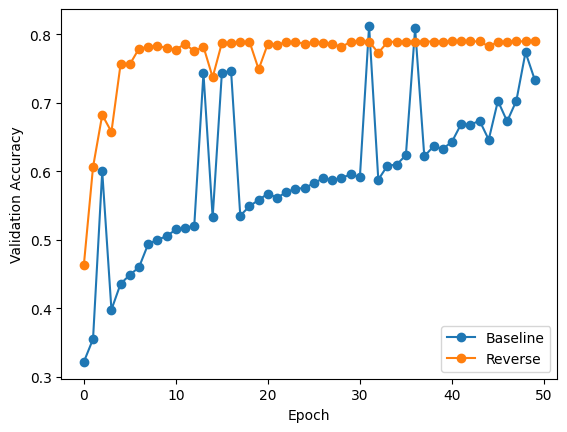

In [97]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_accuracy'],linestyle="-", marker="o", label='Baseline')
plt.plot(history_reverse.history['val_accuracy'],linestyle="-", marker="o", label='Reverse')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()
